#Program 3

##Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge toclassify a new sample

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Datasets_ml/Copy of car_evaluation.csv')

In [7]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
df['unacc'].value_counts()

,count
unacc,
unacc,1209
acc,384
good,69
vgood,65


In [10]:
df.shape

(1727, 7)

In [11]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [12]:
col_name =  ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_name

In [13]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [14]:
df.shape

(1727, 7)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [16]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [17]:
for i in df.columns:
  print(df[i].value_counts())
  print("\n")

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64


maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64


doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64


persons
4       576
more    576
2       575
Name: count, dtype: int64


lug_boot
med      576
big      576
small    575
Name: count, dtype: int64


safety
med     576
high    576
low     575
Name: count, dtype: int64


class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64




In [18]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['class'], axis=1), df['class'], test_size=0.2)

In [19]:
X_train

,buying,maint,doors,persons,lug_boot,safety
988,med,high,2,4,big,high
453,high,vhigh,2,more,med,med
1539,low,med,3,2,small,med
38,vhigh,vhigh,3,4,med,low
202,vhigh,high,5more,4,med,high
...,...,...,...,...,...,...
127,vhigh,high,2,more,small,high
458,high,vhigh,3,2,small,low
337,vhigh,low,2,4,med,high
660,high,med,2,4,med,med


In [20]:
!pip install category_encoders
import category_encoders as ce

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.5 MB/s eta 0:00:00


In [21]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [22]:
X_train

,buying,maint,doors,persons,lug_boot,safety
988,1,1,1,1,1,1
453,2,2,1,2,2,2
1539,3,3,2,3,3,2
38,4,2,2,1,2,3
202,4,1,3,1,2,1
...,...,...,...,...,...,...
127,4,1,1,2,3,1
458,2,2,2,3,3,3
337,4,4,1,1,2,1
660,2,3,1,1,2,2


In [23]:
DTC = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [24]:
DTC.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [25]:
y_pred = DTC.predict(X_test)

In [26]:
print(f"accuracy of model is :  {accuracy_score(y_test, y_pred)*100}")

accuracy of model is :  77.45664739884393


#Draw Decision

In [28]:
import graphviz
from sklearn import tree # Import the tree submodule from sklearn

dot_data = tree.export_graphviz(DTC, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

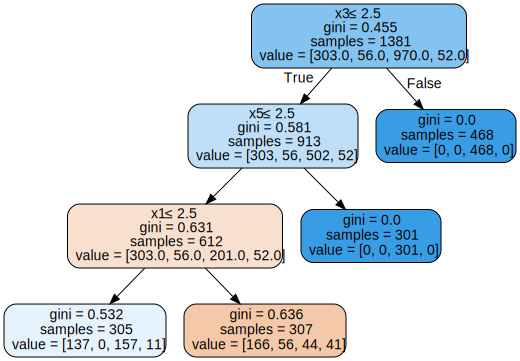

In [29]:
graph